In [1]:
from utils import *
tic()

# use 4 decimals for tables
pd.options.display.float_format = '{:,.4f}'.format

Remise électronique sur ZoneCours au plus tard le **22 février à 23h55** de:

* Ce Jupyter notebook (.ipynb) en guise de rapport, une fois les réponses ajoutées. 
* **Tous** les fichiers *.py* nécessaires pour l'exécution du notebook

Le rapport **doit**:

* être en format .ipynb (des points seront enlevés pour tout autre format).
* inclure le numéro de matricule de tous les membres de l'équipe dans la première cellule (i.e. remplacez ces consignes)
* répondre aux questions et discuter des résultats à l'aide de tables, graphiques, et cellules markdown

Barème:

* **40%** Exactitude des résultats
* **25%** Discussions complètes et **concises** (cellules ``markdown'')
* **20%** Concision du notebook (.ipynb avec minimum de code) et clarté des graphiques
* **15%** Clarté du code (.py)

Dans les tables, présentez 4 décimales après le point.

# Question 1

Une action ne versant pas de dividende cote présentement à 100. Le taux sans risque à 1 mois est de 5%. Vous observez sur le marché les prix suivants pour des puts européens venant à maturité dans 1 mois:

In [2]:
info = get_info()
info

,Strike,Put
0,80.0000,0.1900
1,90.0000,0.6907
2,97.5000,1.6529
3,102.5000,3.3409
4,110.0000,9.8399
5,120.0000,19.5805


Quelles sont les volatilités implicites ('IV') de ces puts? Tracez le graphe des ces IV en fonction de $K/S$ et discutez brièvement.

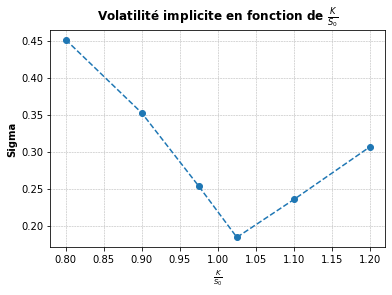

In [3]:
# Données du problème
S_0 = 100
r_f = 0.05
T   = 1/12

# Calcul des volatilités implicites 
sigma = [implied_volatility(opt_price = P, S = S_0,  K = K, r = r_f, y = 0, T = T, is_call   = False)[0] for K, P in info.values]
info['Implied vol.'] = sigma

plot_implied_vol(S_0, info)

Selon la théorie du Modèle de Black-Scholes, la volatilité implicite est constante pour différents K/S0. Cependant, nous observons que la volatilité implicite est supérieur lorsque l'option est dans la monnaie (S0 < K) ou hors de la monnaie (S0 > K). Ce phénomène est dû au fait que le modèle de Black Schole ne prend pas en compte tous les facteurs qui affectent la volatilité implicite des options. Le modèle suppose que la volatilité est constante et que les rendements de l'actif sous-jacent suivent une lois lognormale. Cependant, cela diffère en pratique et les agents ont une perspective différente pour la volatilité future selon où se situe le prix d'exercice et l'actif sous-jacent.

# Question 2

Vous vous intéressez à ces options parce que vous avez, d'autre part, 
émis des produits structurés contenant des puts de même strikes, mais permettant un exercice à tout moment d'ici la maturité. Pour chacun de ces strike, vous désirez donc utiliser un arbre CRR afin de valoriser l'option américaine correspondante.

En premier lieu, vous désirez donc étudier la convergence de votre arbre vers le prix BMS pour les européennes observées sur le marché. Pour des valeurs de $N$ allant de 2 à 100 (`range(2,101)`), tracer, dans une figure 
`
    fig, axes = plt.subplots(3, 2, figsize=(15,20))
`
avec une sous-figure par strike,

* Le prix CRR obtenu pour chaque $N$
* Une ligne horizontale traitillée au prix de marché
* Deux ligne horizontales pointillées à $\pm$1 bp du prix de marché

Discutez brièvement de la qualité de la convergence.

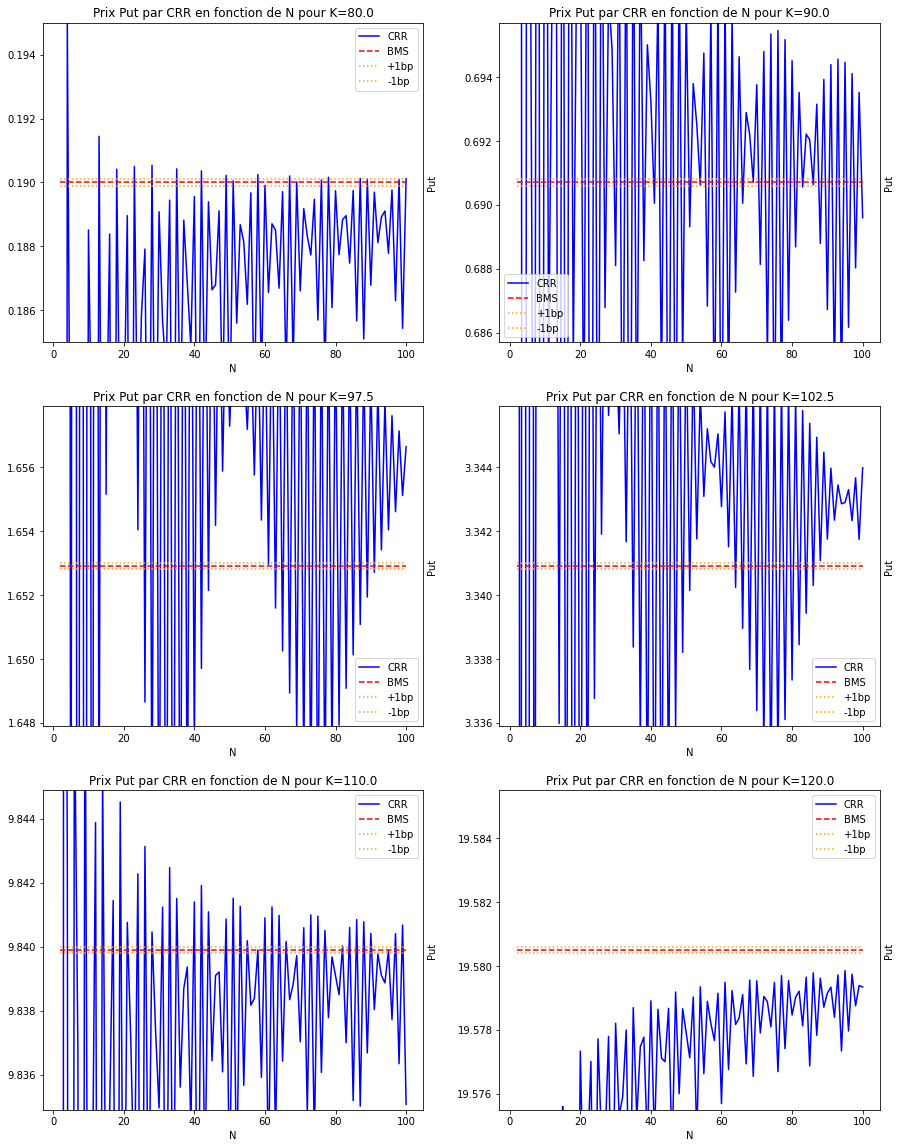

In [4]:
N_Range = np.arange(2, 101)
df_CRR  = CRR_tree_df(S = S_0,  K = info['Strike'],  T = T,  r = r_f, sigma = info['Implied vol.'], Type = 0, N_Range = N_Range)

plot_CRR_tree(df_CRR_list = [[df_CRR, 'CRR', 'b']], N_Range=N_Range, zoom_factor=50)

À première vue, un arbre binomial à 100 pas ne semble pas converger adéquatement vers la vraie valeur. La variabilité de la convergence semble diminuer plus que N croit et converger tranquillement vers la vraie valeur théorique du modèle de Black-Scholes. On sait que les rendements de l'actif sous-jacent dans le modèle de Black-Scholes :

$$E[ln(\dfrac{S(t_n)}{S})] = \mu t_n$$
$$ Var(ln(\dfrac{S(t_n)}{S})) = \sigma^2 t_n$$ 


Cependant, l'arbre binomiale modèlise les rendements de l'actif sous-jacent comme: 
$$E[ln(\dfrac{S(t_n)}{S})] = \mu t_n$$
$$ Var(ln(\dfrac{S(t_n)}{S})) = \sigma^2 t_n - \mu^2 n \Delta t^2$$ 
Donc, comme
$$\Delta t = \dfrac{1}{n}$$

On voit que : $\Delta t^2  \xrightarrow{} 0$ plus rapidement que $n \xrightarrow{} \infty$ ce qui fait en sorte que $Var(ln(\dfrac{S(t_n)}{S}))$ converge vers $\sigma^2 t_n$. Donc, les rendements de l'actif sous-jacent converge vers celles du modèle BS. 




Plus que le Strike s'éloigne de la valeur actuelle du sous-jacent, plus qu'il semble avoir un biais dans la convergence. 

# Question 3

Répétez la figure ci-haut, en vous concentrant sur les pas $N = range(400, 501)$. 
Ajoutez aussi, pour chaque strike, une courbe raportant la valeur obtenu à $N$ avec l'arbre CRR ajusté à l'aide de la correction de Broadie et Detemple. Comparez les deux méthodes. En particulier, soulignez l'avantage de l'ajustement quand viendra le temps de choisir un nombre de pas de temps respectant une tolérance de $\pm$1bp.

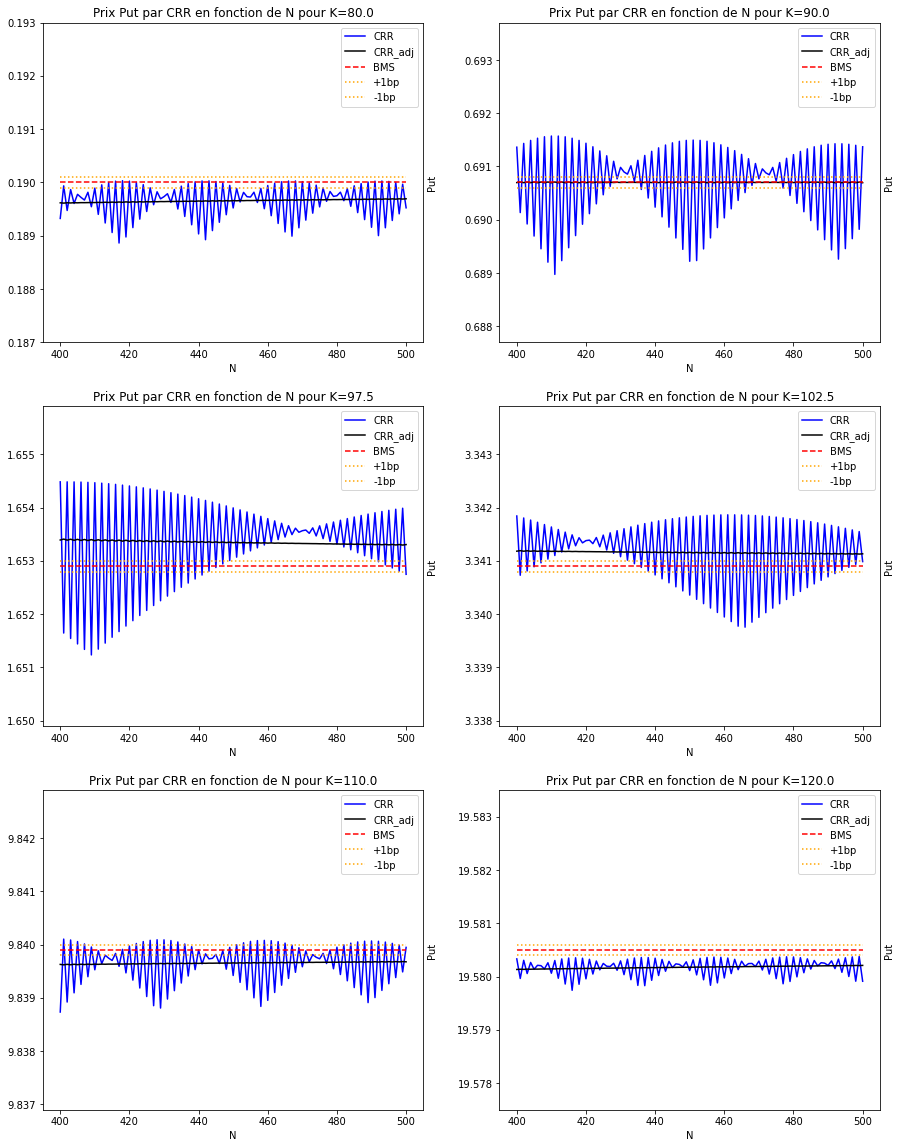

In [5]:
N_Range   = np.arange(400, 501)
df_CRR    = CRR_tree_df(S     = S_0, K = info['Strike'], T = T, r = r_f, sigma = info['Implied vol.'], Type = 0, N_Range = N_Range)
df_CRR_BD = CRR_tree_BD_df(S  = S_0, K = info['Strike'], T = T, r = r_f, sigma = info['Implied vol.'], Type = 0, N_Range = N_Range)

plot_CRR_tree(df_CRR_list = [[df_CRR, 'CRR', 'b'],[df_CRR_BD, 'CRR_adj', 'k']], N_Range = N_Range, zoom_factor=30)

On observe qu'il y a beaucoup moins de variabibilité dans la convergence via la méthode de Broadie et Detemple. Cela peut-être dû au fait qu'à l'avant dernier noeud, on utilise la formule de BS afin de trouver le prix du put. $E[(S_{T_{N-1}} - K) \mathbb{1}(S_{T_{N-1}} < K )]$



Cela permet d'inférer $n \xrightarrow{} \infty $, donc $\Delta t = \dfrac{1}{n}$ tend rapidement vers 0 ce qui réduit la variance des rendements du sous-jacent, donc l'incertitude relié au prix de ce dernier. En effet, il sera préférable d'utiliser l'approche de Broadie et Detemple lorsqu'il sera question du nombre de pas respectant la tolérance.



# Question 4

En utilisant maintenant que les pas $N = range(500, 3001, 100)$, n'utilisez que l'arbre avec ajustement. Tracez à nouveau une figure de convergence 3x2. Combien de pas de temps sont nécessaires pour que tous les strikes respectent une tolérance de $\pm$1bp?

Assurez-vous aussi, pour chaque $N$, de calculer les 3 approximations suivantes du gamma:
\begin{align}
 \Gamma_0 &= \frac{p_{uu}-2p_{ud}+p_{dd}}{\left[(u-d) S\right]^{2}},
 \\
 \Gamma_1 &= \frac{
    \frac{(p_{uu}-p_{ud})}{u^{2}S-S} 
    - \frac{(p_{ud}-p_{dd})}{S-d^{2}S}
  }{Su - Sd},
 \\
 \Gamma_2 &= \frac{
    \frac{(p_{uu}-p_{ud})}{u^{2}S-S} 
    - \frac{(p_{ud}-p_{dd})}{S-d^{2}S}
  }{\frac{1}{2}(Su^2 - Sd^2)}.
\end{align}

Produisez une nouvelle figure de convergence, cette fois vers $\Gamma_{BMS}\pm 1bp$. Discutez brièvement.

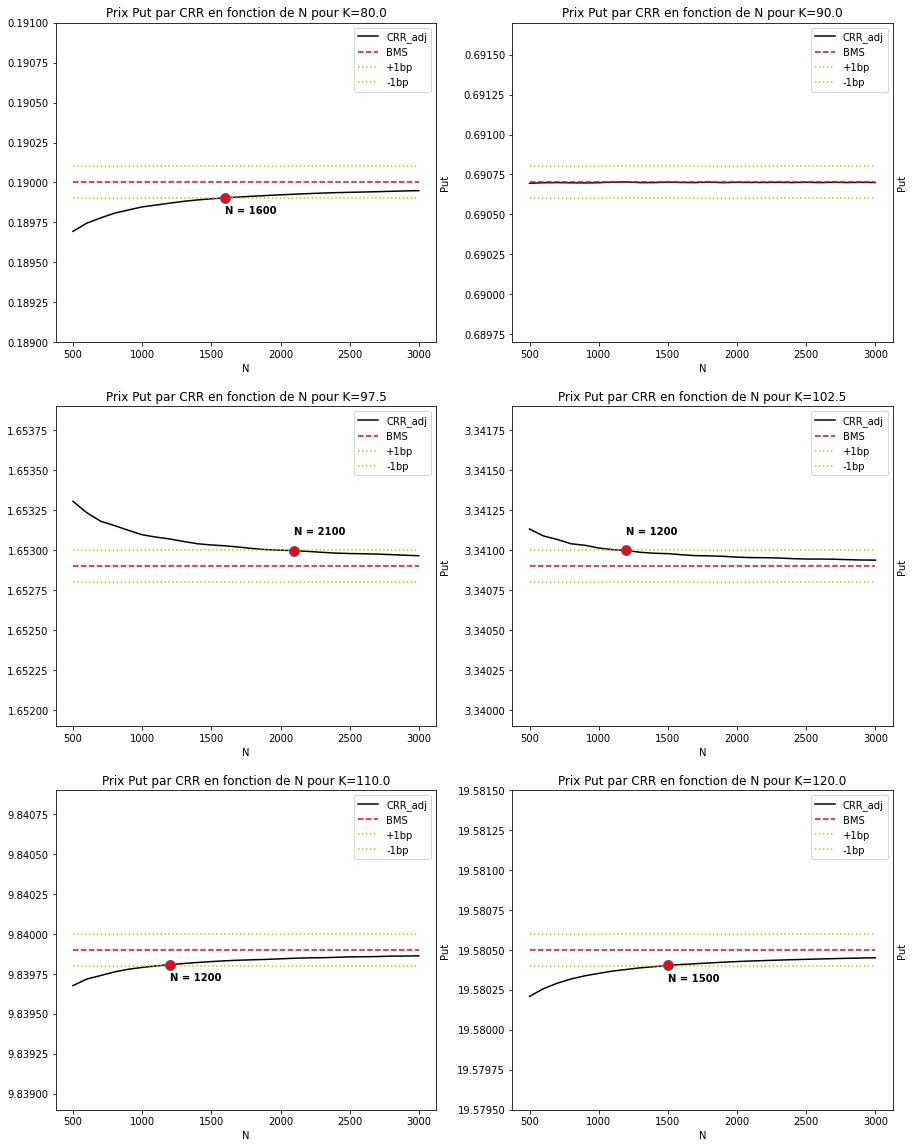

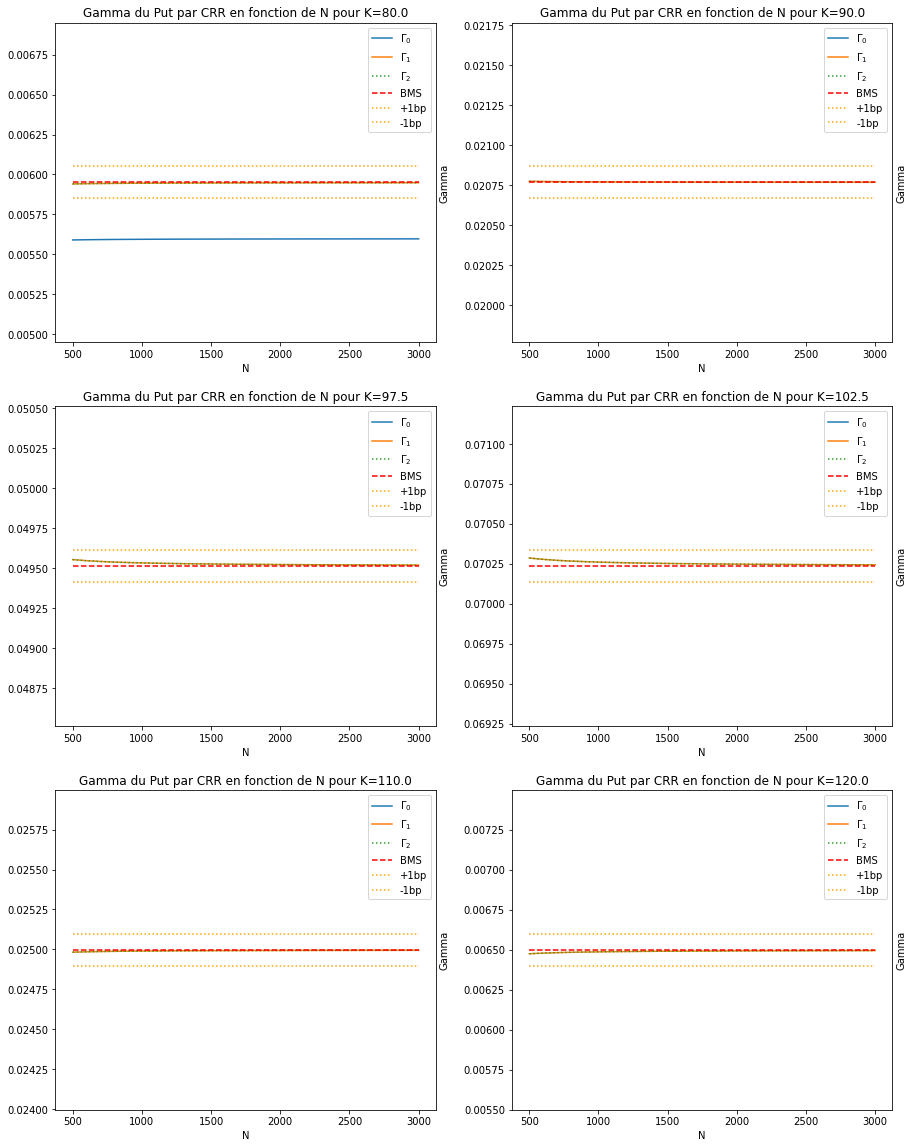

In [6]:
N_Range             = np.arange(500, 3001, 100)
gamma_bms           = [gamma(S = S_0, K = K, r = r_f, y = 0, T = T, sigma = Sig) for K,_,Sig in info.values]
df_CRR_BD, gamma_BD = CRR_tree_BD_df(S  = S_0, K = info['Strike'], T = T, r = r_f, 
                                  sigma = info['Implied vol.'], Type = 0, N_Range = N_Range, ret_gamma = True)

plot_CRR_tree(df_CRR_list = [[df_CRR_BD, 'CRR_adj', 'k']], N_Range = N_Range, zoom_factor = 10, cross = True)
plot_gamma(gamma = gamma_BD, gamma_bms = gamma_bms, N_Range = N_Range, zoom_factor = 10)

# Question 5
Soit $N^*$ le nombre de pas de temps nécessaire à une convergence pour les 6 strikes (cf. Question 4). Ajoutez à la table dans l'énoncé de la Question 1 les colonnes suivantes:

`
colnames = ['IV','Amer','EarlyEx','Gamma_e','Gamma_a','Gamma_ex']
`

qui contiendront pour chaque strike, respectivement, la volatilité implicite (en Q1), la valeur de l'américaine, la prime associée à l'exercice anticipé et le gamma de l'européenne (BMS) et de l'américaine, et la différence entre les gammas.

Discutez.

In [7]:
# Nombre de pas nécessaire à la convergence (voir Q4)
N_star  = 2100
N_Range = np.arange(N_star, N_star + 1)

# Calcul des valeurs des puts américains et des gammas
Amer, Gamma_a = CRR_tree_BD_df(S  = S_0, K = info['Strike'], T = T, r = r_f, sigma = info['Implied vol.'], 
                                Type = 1, N_Range = N_Range, ret_gamma = True)

Euro, Gamma_e = CRR_tree_BD_df(S  = S_0, K = info['Strike'], T = T, r = r_f, sigma = info['Implied vol.'], 
                                Type = 0, N_Range = N_Range, ret_gamma = True)

# Mise en forme de de la table info
info['Amer']     = list(Amer.iloc[0])
info['EarlyEx']  = info['Amer'] - info['Put'] 
info['Gamma_e']  = [float(gamma_e['gamma_1']) for gamma_e in Gamma_e]
info['Gamma_a']  = [float(gamma_a['gamma_1']) for gamma_a in Gamma_a]
info['Gamma_ex'] = info['Gamma_a'] - info['Gamma_e']

info = info.rename(columns={'Implied vol.': 'IV'})
info


,Strike,Put,IV,Amer,EarlyEx,Gamma_e,Gamma_a,Gamma_ex
0,80.0000,0.1900,0.4512,0.1904,0.0004,0.0059,0.0060,0.0000
1,90.0000,0.6907,0.3523,0.6939,0.0032,0.0208,0.0209,0.0002
2,97.5000,1.6529,0.2534,1.6684,0.0155,0.0495,0.0504,0.0009
3,102.5000,3.3409,0.1845,3.4083,0.0674,0.0702,0.0746,0.0044
4,110.0000,9.8399,0.2356,10.0660,0.2261,0.0250,0.0296,0.0046
5,120.0000,19.5805,0.3067,20.0000,0.4195,0.0065,0.0000,-0.0065


# Question 6

L'action sous étude à, historiquement, eu une volatilité $\sigma_0 = 16\%$. Vous croyez que cette mesure est adéquate pour le mois à venir. La simulation ci-après offre donc une représentation des scénarios possible (sous les hypothèses BMS).

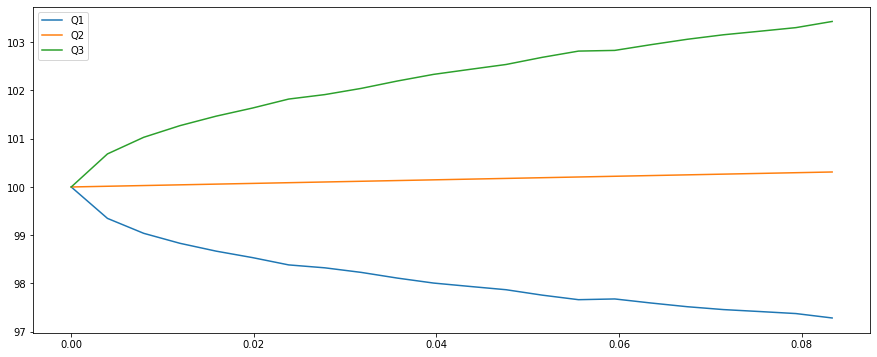

In [8]:
sigma_0 = 0.16
dt      = 1/252 # Every day, assuming 252 business days per year
n_days  = int(T/dt) 
n_sim   = 10000
shocks  = antithetic_normal(n_days, n_sim)
S_t     = simulate_underlying(S_0, r_f, 0.0, sigma_0, dt, shocks)

fig,ax = plt.subplots(1,1,figsize=(15,6))
time_t = np.arange(S_t.shape[0])*dt
stats = pd.DataFrame(S_t.T).describe()
ax.plot(time_t, stats.T['25%'], label='Q1')
ax.plot(time_t, stats.T['50%'], label='Q2')
ax.plot(time_t, stats.T['75%'], label='Q3')
ax.legend();


Si les hypothèse BMS étaient effectivement respectées, quelle serait le prix des 6 puts 
d'intérêt pour une volatilité $\sigma_0$? Quelle est la différence $p_{mkt} - p_{bms}$? Que justifie cette différence selon vous?

In [107]:
#On va calculer la valeur des puts à l'aide de BS
#(S, K, r, y, T, sigma, is_call, ret_delta=False


tmp = np.ones(info.shape[0])
k = np.array(info["Strike"])

tmp = option_price(S_0, K = k, r = r_f, y=0, T=T, sigma = sigma_0, is_call = False,ret_delta=False)

result = pd.DataFrame({"BMS_IV":info["Put"],
                       "BMS_Fix_Sig": tmp,
                       "Difference": info["Put"]- tmp})
result

,BMS_IV,BMS_Fix_Sig,Difference
0,0.1900,0.0000,0.1900
1,0.6907,0.0130,0.6777
2,1.6529,0.7208,0.9321
3,3.3409,3.0793,0.2616
4,9.8399,9.5867,0.2532
5,19.5805,19.5011,0.0794


La différence est dû au fait que la volatilité est constante dans le modèle de Black Scholes et qu'elle varie lorsqu'on regarde la volatilité implicite que le marché anticipe. Le modèle de Black Schole ne prend pas en compte tous les facteurs qui affectent la volatilité implicite des options. Le modèle suppose que la volatilité est constante et que les rendements de l'actif sous-jacent suivent une lois lognormale. Cependant, cela diffère en pratique et les agents ont une perspective différente pour la volatilité future selon où se situe le prix d'exercice et l'actif sous-jacent.

Pour chacun des 6 puts européen mentionnés précédemment, vous souhaitez utiliser les simulations ci-haut afin d'évaluer une stratégie de delta-hedging, sous l'hypothèse que vous avez vendu le put en question (négliger le multiplicateur de 100 ici). À tous moment $t = n\Delta t$, vous calculerez le delta de chaque put en utilisant la $\sigma(t,K)$ définie comme suit:
\begin{equation*}
    \sigma^2(t,K) = \sigma_0^2 + \frac{T - t}{T} (IV^2(0,K) - \sigma_0^2)
\end{equation*}
Quelle hypothèse faites-vous, implicitement? Cette hypothèse est-elle raisonnable en pratique?

Produisez une sous-figure par strike (`fig, axes = plt.subplots(3, 2, figsize=(15,20))`), chacune rapportant l'histogramme de la valeur finale de votre compte de marge pour un put donné. Assurez-vous que tous les histogramme utilisent les mêmes intervalles, e.g., 

`
edges = np.linspace(-1.25,2.25,100)
...
ax.hist(M[-1,:], edges);
`

Discutez des résultats. En particulier, pourquoi la distribution ne semble-t-elle pas avoir une moyenne nulle?

In [280]:
n_steps = n_days
n_strike = info.shape[0]
sigma_m = np.empty((n_strike, n_steps+1))

#Time to maturity at each step (T-t)
t =  np.array([n * dt for n in range(n_steps+1)])

for k in range(n_strike):
    sigma_m[k,:] = sigma_0 **2 + (T-t) * (info["IV"][k]**2 - sigma_0**2)

#Calculate -N(-d1) for a k (delta)

d1_sim = np.empty((n_sim, n_steps+1, n_strike))

for k in range(n_strike):
    d1_sim[:,:,k] = -norm.cdf(-d1(S =S_t.T, K = info["Strike"][k], r = r_f, y=0, T = (T-t), sigma = np.sqrt(sigma_m[k])))



/Users/sebastiencaron/Documents/GitHub/RSDC/produits_derives/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return (np.log(S/K) + (r - y + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))


In [281]:

#Calculate Put price at every ndays for every n_sim and K
price_put = np.empty((n_sim, n_steps+1, n_strike))

for k in range(n_strike):
    price_put[:, :, k] = option_price(S =S_t.T, K = info["Strike"][k], r = r_f, y=0, T = t, sigma = np.sqrt(sigma_m[k]), is_call = False, ret_delta=False)

In [295]:
#Je dois emprunter / prêter le montant égal à mon portefeuille au taux intérêt sur un dt

interest = math.exp(r_f * dt)

#Valeur de mon compte en banque avec intérêt appliqué 
bank = np.empty((n_sim, n_steps, n_strike))
for k in range(n_strike):
    bank[:,:,k] = -(price_put[:,1:,k] - price_put[:,:-1,k]) + (S_t.T[:,1:] - S_t.T[:,:-1]) * d1_sim[:,:-1,k] + (price_put[:,:-1,k] - (d1_sim[:,:-1,k] * S_t.T[:,:-1]))*(interest -1)


(array([5.000e+00, 1.100e+01, 6.000e+00, 9.000e+00, 1.100e+01, 1.600e+01,
        1.300e+01, 1.100e+01, 1.200e+01, 1.700e+01, 2.200e+01, 2.900e+01,
        2.000e+01, 2.400e+01, 2.600e+01, 3.100e+01, 2.500e+01, 2.900e+01,
        2.900e+01, 3.500e+01, 4.900e+01, 4.600e+01, 6.400e+01, 5.300e+01,
        8.100e+01, 7.700e+01, 1.020e+02, 1.100e+02, 1.280e+02, 1.380e+02,
        2.400e+02, 3.430e+02, 5.910e+02, 1.412e+03, 5.067e+03, 9.580e+02,
        9.600e+01, 2.300e+01, 8.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

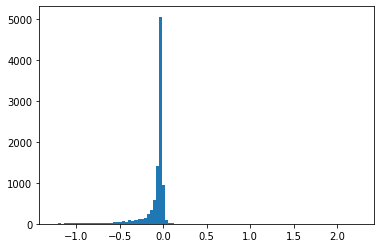

In [303]:
#Valeur de ma position à chaque fin de periode, compte marge



M = np.empty((n_sim, n_steps, n_strike))
for k in range(n_strike):
    for i in range(n_sim):
        M[i,:,k] = bank[i,:,k].cumsum()
        
edges = np.linspace(-1.25,2.25,100)
plt.hist(M[: ,-1, 1], edges)

In [306]:
fig, axes = plt.subplots(3, 2, figsize=(15,20))

array([ 1.87356298e-06,  1.86077819e-04, -1.46637259e-05, ...,
       -1.53416502e-05,  1.80550144e-05, -2.69371206e-05])

Oui, l'hypothèse est valide comme les prix extrêmes risque d'avoir une plus grande volatilité. D'ailleurs, on utilise la volatilité implicite que les agents du marché anticipent et on pondére selon l'incertitude relié au passge du temps. En effet, lorsqu'on est à $t=0$, on utilise la volatilité implicite et lorsque $t = T$, on utilise seulement la volatilité de l'actif sous-jacent observé. Le but d'ajouter une fonction à la volatilité, est d'assurer une meilleur prédiction future de la volatilité étant donné l'hypothèse BS que la volatilité est constante. Cela permet d'améliorer le delta hedging en prenant en compte la volatilité modifié qui reflète en partie ce que le marché anticipe.

Discutez (sans les implémentez) des modifications et nuances que vous devriez apporter à votre analyse si les puts étaient américains? Donnez suffisamment de détails, en vous référant au besoin à des lignes de votre code, pour que l'on saisisse bien les difficultés et limites de l'exercice.

In [9]:
toc()

Elapsed time: 25.374607 seconds.

